In [1]:
import random
import matplotlib.pyplot as plt


In [2]:
cost_matrix = [
    [0   , 59.6, 198 , 51.0, 260 , 26.7, 124 , 207 , 142 , 21.1, 260 , 175 , 169 , 321 , 281 , 93.8, 208 , 426 , 29.9, 409],
    [59.3, 0   , 159 , 105 , 207 , 82.1, 63.1, 154 , 158 , 69  , 273 , 139 , 220 , 380 , 228 , 79.0, 262 , 489 , 70.2, 377],
    [199 , 159 , 0   , 187 , 115 , 225 , 162 , 60.6, 317 , 193 , 259 , 244 , 249 , 518 , 136 , 104 , 356 , 623 , 228 , 448],
    [51.0, 104 , 187 , 0   , 304 , 77.1, 173 , 252 , 193 , 38.9, 211 , 225 , 121 , 373 , 325 , 82.8, 185 , 477 , 80.3, 458],
    [259 , 205 , 114 , 300 , 0   , 282 , 200 , 57.5, 367 , 261 , 348 , 276 , 363 , 580 , 38.7, 218 , 462 , 684 , 283 , 430],
    [26.9, 81.2, 225 , 77.0, 281 , 0   , 145 , 229 , 137 , 46.8, 286 , 191 , 195 , 315 , 302 , 121 , 232 , 419 , 24.5, 422],
    [124 , 62.8, 160 , 169 , 199 , 146 , 0   , 150 , 169 , 133 , 333 , 82.6, 287 , 444 , 220 , 139 , 326 , 548 , 146 , 345],
    [208 , 154 , 62.0, 249 , 57.3, 233 , 159 , 0   , 314 , 218 , 316 , 206 , 311 , 528 , 78.6, 166 , 413 , 633 , 234 , 416],
    [142 , 159 , 327 , 193 , 365 , 136 , 169 , 317 , 0   , 162 , 402 , 179 , 314 , 379 , 387 , 235 , 348 , 463 , 113 , 382],
    [23.6, 58.0, 193 , 40.3, 269 , 49.8, 133 , 217 , 165 , 0   , 249 , 190 , 159 , 345 , 290 , 84.8, 222 , 450 , 53.0, 423],
    [262 , 269 , 258 , 213 , 347 , 288 , 334 , 315 , 404 , 250 , 0   , 405 , 119 , 497 , 359 , 194 , 206 , 602 , 291 , 643],
    [176 , 139 , 242 , 225 , 275 , 187 , 82.2, 198 , 179 , 189 , 409 , 0   , 344 , 493 , 290 , 215 , 382 , 597 , 164 , 243],
    [169 , 219 , 249 , 120 , 362 , 195 , 285 , 309 , 311 , 157 , 119 , 356 , 0   , 402 , 374 , 145 , 130 , 506 , 193 , 576],
    [321 , 380 , 518 , 372 , 579 , 315 , 449 , 527 , 379 , 343 , 498 , 494 , 404 , 0   , 601 , 414 , 289 , 108 , 338 , 727],
    [281 , 226 , 135 , 322 , 39.0, 304 , 221 , 79.7, 384 , 282 , 355 , 291 , 373 , 601 , 0   , 239 , 483 , 706 , 305 , 445],
    [95.2, 77.4, 105 , 82.7, 218 , 121 , 144 , 164 , 233 , 89.3, 198 , 215 , 145 , 414 , 240 , 0   , 252 , 519 , 124 , 453],
    [209 , 262 , 356 , 186 , 462 , 235 , 331 , 410 , 348 , 220 , 206 , 382 , 130 , 289 , 483 , 252 , 0   , 394 , 236 , 616],
    [425 , 489 , 623 , 477 , 684 , 420 , 553 , 631 , 431 , 448 , 602 , 598 , 508 , 108 , 705 , 519 , 393 , 0   , 443 , 831],
    [29.1, 70.2, 227 , 82.7, 279 , 22.8, 146 , 227 , 114 , 48.9, 292 , 167 , 201 , 336 , 300 , 123 , 235 , 440 , 0   , 401],
    [410 , 377 , 447 , 459 , 430 , 422 , 345 , 409 , 382 , 423 , 643 , 243 , 577 , 726 , 445 , 453 , 616 , 831 , 399 , 0]
]

In [3]:
class TabuSearch:
    def __init__(self, matrix, tabu_size=10):
        self.cost_matrix = matrix
        self.len_matrix = len(matrix)
        self.tabu_list = []
        self.tabu_size = tabu_size
        self.best_sol = []
        self.best_cost = float('inf')
        self.history_cost = []

    def calculate_cost(self, solution):
        """Retorna função objetivo/custo da solução."""

        cost = 0
        for i in range(self.len_matrix-1):
            # Solução é uma lista dos índices da cidade.
            # A ordem em que as cidades são visitadas é a ordem da lista.
            # Portanto, visitamos a cidade i+1 após i.
            cost += self.cost_matrix[solution[i]][solution[i+1]]
        cost += self.cost_matrix[solution[-1]][solution[0]]

        return cost
    
    def get_initial_solution(self):
        """Retorna uma solução inicial aleatória."""

        solution = list(range(self.len_matrix))
        random.shuffle(solution)

        return solution
        
    
    def get_neighborhood(self, solution):
        """Retorna vizinhança da solução através de movimentos de TROCA"""

        neighborhood = []
        for i in range(self.len_matrix):
            for j in range(i+1, self.len_matrix):
                neighbor = solution.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                move = (i, j)  # movimento que gerou o vizinho
                neighborhood.append((neighbor, move))

        return neighborhood
    
    def get_best_neighbor(self, neighborhood):
        """Retorna o melhor vizinho (candidato) da vizinhança."""

        best_neighbor_cost = float('inf')

        for neighbor, move in neighborhood:
            neighbor_cost = self.calculate_cost(neighbor)

            if move not in self.tabu_list:
                # Se o vizinho é melhor que a solução corrente e não está na lista tabu
                # então atualiza a solução corrente.
                if neighbor_cost < best_neighbor_cost:
                    best_neighbor = neighbor
                    best_neighbor_cost = neighbor_cost
                    best_move = move
            # Função de aspiração
            elif neighbor_cost < self.best_cost:
                self.tabu_list.remove(move)
                self.best_cost = neighbor_cost
                self.best_sol = neighbor

        return best_neighbor, best_neighbor_cost, best_move
    
    def update_tabu(self, solution):
        """Atualiza lista tabu."""

        if len(self.tabu_list) >= self.tabu_size:
            self.tabu_list.pop(0)
        self.tabu_list.append(solution)

    def path_relinking(self, current_solution, target_solution):
        intermediate_solution = current_solution.copy()
        best_intermediate_solution = intermediate_solution
        best_intermediate_cost = self.calculate_cost(intermediate_solution)

        for i in range(self.len_matrix):
            if intermediate_solution[i] != target_solution[i]:
                swap_index = intermediate_solution.index(target_solution[i])
                intermediate_solution[i], intermediate_solution[swap_index] = intermediate_solution[swap_index], intermediate_solution[i]
                
                current_cost = self.calculate_cost(intermediate_solution)
                if current_cost < best_intermediate_cost:
                    best_intermediate_solution = intermediate_solution.copy()
                    best_intermediate_cost = current_cost

        return best_intermediate_solution, best_intermediate_cost

    def search(self, max_iter=300):
        """Executa busca tabu."""

        # Inicialização aleatória
        current_sol = self.get_initial_solution()
        current_cost = self.calculate_cost(current_sol)
        if current_cost < self.best_cost:
            self.best_cost = current_cost
            self.best_sol = current_sol

        # Executa busca
        for _ in range(max_iter):
        # while self.best_cost > 2682:
            neighborhood = self.get_neighborhood(current_sol)
            best_neighbor, best_neighbor_cost, current_move = self.get_best_neighbor(neighborhood)

            # Atualiza melhor solução
            if best_neighbor_cost < self.best_cost:
                self.best_cost = best_neighbor_cost
                self.best_sol = best_neighbor

            self.update_tabu(current_move)
            
            current_sol, current_cost = self.path_relinking(current_sol, best_neighbor)

            self.history_cost.append(best_neighbor_cost)
            self.history_cost.append(current_cost)

        return self.best_sol, self.best_cost
    

Melhor custo: 2681.8


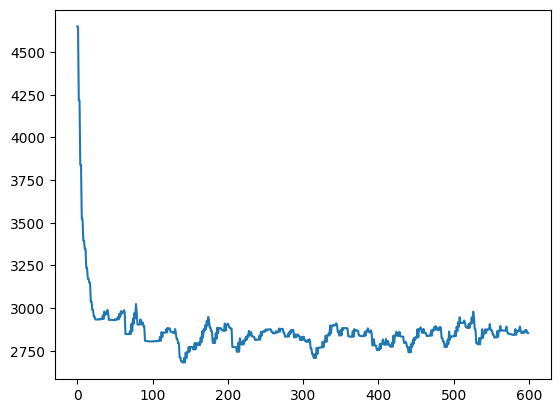

In [7]:
tabu_search = TabuSearch(cost_matrix, tabu_size=15) 
tabu_search.search(max_iter=300)

print("Melhor custo:", tabu_search.best_cost)
plt.plot(tabu_search.history_cost)
plt.show()